<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/BRENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [241]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [242]:
#Get the stock quote
data = yf.download('BZ=F', start=start_date, end=end_date)
#df = web.DataReader('BZ=F', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,66.470001,66.570000,65.730003,66.250000,66.250000,25810
2020-01-03,66.290001,69.480003,66.220001,68.599998,68.599998,78848
2020-01-06,69.070000,70.720001,68.190002,68.910004,68.910004,51933
2020-01-07,68.580002,68.739998,67.650002,68.269997,68.269997,41178
2020-01-08,68.470001,71.989998,64.940002,65.440002,65.440002,85232
...,...,...,...,...,...,...
2021-07-22,72.099998,73.900002,71.750000,73.790001,73.790001,34425
2021-07-23,73.709999,74.209999,73.330002,74.099998,74.099998,23724
2021-07-26,74.169998,74.830002,72.750000,74.500000,74.500000,31628


In [243]:
#Get the number of rows and columns in the data set
data.shape



(393, 6)

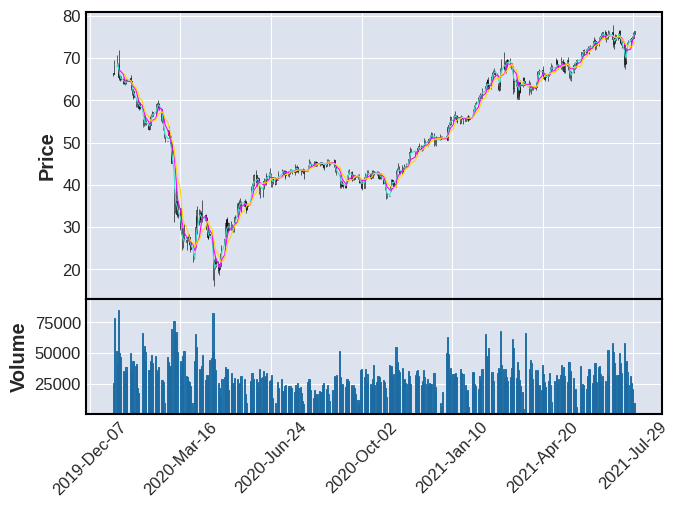

In [244]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [245]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

315

In [246]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.82085377],
       [0.86196642],
       [0.86738988],
       [0.85619312],
       [0.80668307],
       [0.80545844],
       [0.7986355 ],
       [0.78498948],
       [0.79006297],
       [0.78149058],
       [0.79233738],
       [0.7963611 ],
       [0.79181242],
       [0.76766971],
       [0.74720088],
       [0.72358293],
       [0.69961514],
       [0.70293912],
       [0.70818759],
       [0.68159556],
       [0.67932123],
       [0.68002103],
       [0.60584325],
       [0.62893632],
       [0.62281319],
       [0.61476562],
       [0.5937719 ],
       [0.60671798],
       [0.63785868],
       [0.64748078],
       [0.66462563],
       [0.67214838],
       [0.69611617],
       [0.69944022],
       [0.68526945],
       [0.64678098],
       [0.62316309],
       [0.59657106],
       [0.57470262],
       [0.54566133],
       [0.54496152],
       [0.5691043 ],
       [0.55633314],
       [0.53638913],
       [0.45381388],
       [0.26294614],
       [0.31298114],
       [0.287

In [247]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.82085377, 0.86196642, 0.86738988, 0.85619312, 0.80668307,
       0.80545844, 0.7986355 , 0.78498948, 0.79006297, 0.78149058,
       0.79233738, 0.7963611 , 0.79181242, 0.76766971, 0.74720088,
       0.72358293, 0.69961514, 0.70293912, 0.70818759, 0.68159556,
       0.67932123, 0.68002103, 0.60584325, 0.62893632, 0.62281319,
       0.61476562, 0.5937719 , 0.60671798, 0.63785868, 0.64748078,
       0.66462563, 0.67214838, 0.69611617, 0.69944022, 0.68526945,
       0.64678098, 0.62316309, 0.59657106, 0.57470262, 0.54566133,
       0.54496152, 0.5691043 , 0.55633314, 0.53638913, 0.45381388,
       0.26294614, 0.31298114, 0.28796364, 0.24300213, 0.25402378,
       0.18754373, 0.16445066, 0.09709586, 0.15990202, 0.13383485,
       0.13470961, 0.13680896, 0.14100769, 0.12263822, 0.09797062])]
[0.06000700540214143]



In [248]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(255, 60, 1)

In [249]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [250]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [255]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

255/255 [==============================] - 9s 36ms/step - loss: 0.0041


In [256]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [257]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [258]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [259]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1.7342984615228114

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


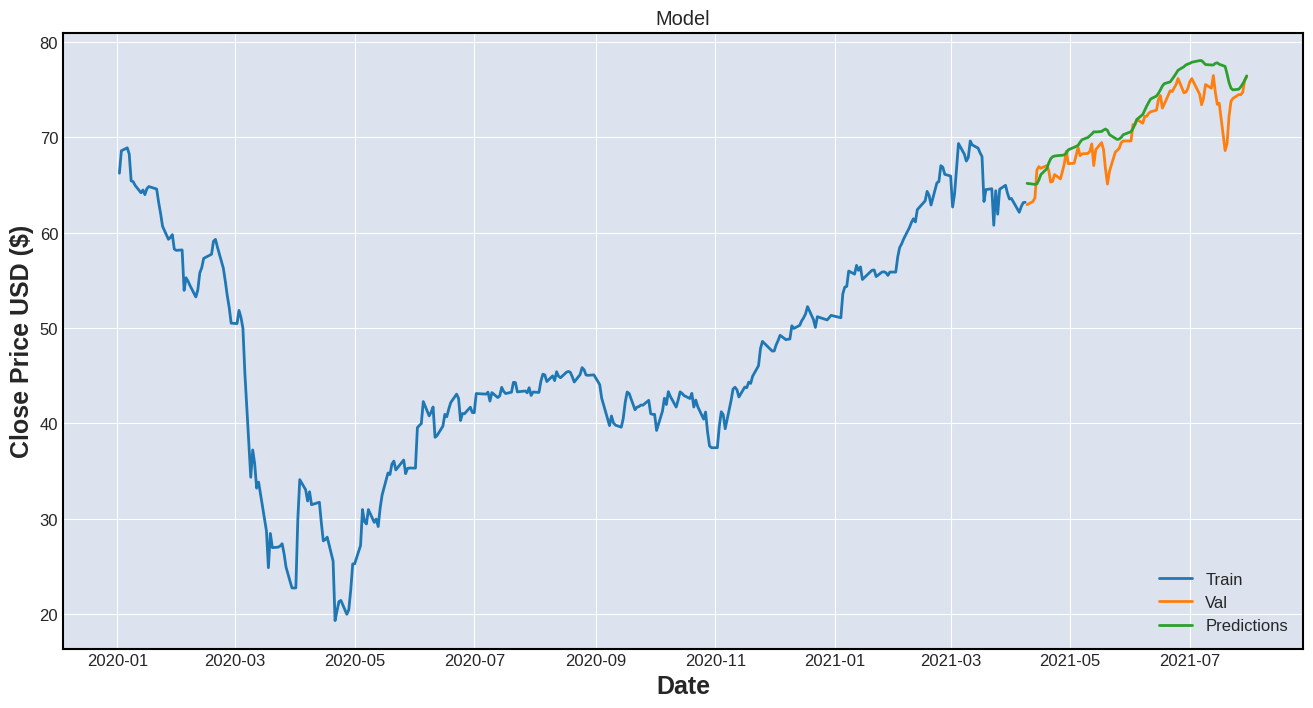

In [260]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [261]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,62.950001,65.182373
2021-04-12,63.279999,65.106400
2021-04-13,63.669998,65.081978
2021-04-14,66.580002,65.129448
2021-04-15,66.940002,65.528587
...,...,...
2021-07-26,74.500000,75.060638
2021-07-27,74.480003,75.311760
2021-07-28,74.739998,75.630104


In [262]:
#get the quote
apple_quote = yf.download('BZ=F', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[76.98628]]
